# Cell summary stats

In [1]:
import pandas as pd
from gctree.utils import hamming_distance
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = "../nextflow/results"

In [3]:
output_dir = "output/cell-summary"

In [4]:
df = pd.read_csv(f"{results}/merged-results/observed-seqs.csv")

df.query("HK_key_cell_type == 'GC'", inplace=True)

# hack to get PR batch
df["PR"] = df.fasta_header_HC.str[3]

df

,ID_HK,well,HK_key_plate,HK_key_mouse,HK_key_gc,HK_key_node,HK_key_cell_type,aa_substitutions_IMGT,delta_bind,delta_expr,...,fasta_header_LC,fasta_seq_HC,fasta_seq_LC,partis_sequence_HC,partis_sequence_LC,seq_aa_HC,seq_aa_LC,seq_nt_HC,seq_nt_LC,PR
0,210923P01B01HK,B01,18,1,20,LB,GC,Y38(H)F L50(H)F S57(H)G G63(H)D S64(H)T A105(H...,-0.205722,-0.07307,...,PR-1-01.210923.P03.B01.K.R.1-550,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGFWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...,1
1,210923P01B03HK,B03,18,1,20,LB,GC,L50(H)F A105(H)G G70(L)E D74(L)A N93(L)Y Q105(...,1.163051,-0.02419,...,PR-1-01.210923.P03.B03.K.R.1-263,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...,1
2,210923P01D01HK,D01,18,1,20,LB,GC,I42(H)N Y42(L)S,-0.043774,-1.36586,...,PR-1-01.210923.P03.D01.K.R.1-582,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWNRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWSQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...,1
3,210923P01D04HK,D04,18,1,20,LB,GC,L50(H)F A105(H)G S83(L)F,0.385803,0.03445,...,PR-1-01.210923.P03.D04.K.R.1-425,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...,1
4,210923P01D07HK,D07,18,1,20,LB,GC,I30(H)F S57(H)N K51(L)E,-0.161923,-0.17460,...,PR-1-01.210923.P01.D07.K.R.1-81,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSFTSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPEA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10544,230512P02H05HK,H05,2,8,8C,RI,GC,L50(H)V S64(H)T D107(H)E N108(L)K,1.049859,0.17384,...,PR-2-02.230512.P02.H05.K.R.1-177,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTTG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKVE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagttg...,2
10545,230512P02H07HK,H07,2,8,8C,RI,GC,K14(H)Q N48(H)D N92(H)K A105(H)G N38(L)D K51(L...,-1.130521,-0.18605,...,PR-2-02.230512.P02.H07.K.R.1-199,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGCAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGCAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVQPSQTLSLTCSVTGDSITSGYWNWIRKFPGDKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTDVAWYQQKPGQSPEA...,gaggtgcagcttcaggagtcaggacctagcctcgtgcaaccttctc...,gacattgtgatgactc

GC metadata

In [5]:
metadata_PR1 = pd.read_csv("../metadata.PR1.csv")[["imm_duration", "strain", "mouse", "gc", "node", "cell_type"]]
metadata_PR1["pr"] = "1"
metadata_PR1["gc"] = metadata_PR1["gc"].astype(str)
metadata_PR1.rename({"imm_duration": "time"}, axis=1, inplace=True)
metadata_PR2 = pd.read_csv("../metadata.PR2.csv")[["mouse", "gc", "node", "cell_type"]]
metadata_PR2["pr"] = "2"
metadata_PR2["time"] = "d15"
metadata_PR2["strain"] = "wt"

metadata = pd.concat([metadata_PR1, metadata_PR2], ignore_index=True)
metadata.index = "PR" + metadata["pr"] + "_mouse" + metadata["mouse"].astype(str) + "_GC" + metadata["gc"]
metadata

,time,strain,mouse,gc,node,cell_type,pr
PR1_mouse1_GC20,d20,wt,1,20,LB,GC,1
PR1_mouse2_GC32,d20,wt,2,32,LB,GC,1
PR1_mouse2_GC38,d20,wt,2,38,LA,GC,1
PR1_mouse3_GC55,d20,wt,3,55,RB,GC,1
PR1_mouse3_GC58,d20,wt,3,58,LB,GC,1
...,...,...,...,...,...,...,...
PR2_mouse1_GC2B,d15,wt,1,2B,LP,GC,2
PR2_mouse6_GC21A,d15,wt,6,21A,LP,GC,2
PR2_mouse6_GC22B,d15,wt,6,22B,RI,GC,2
PR2_mouse5_GC17A,d15,wt,5,17A,RP,GC,2


In [6]:
set(metadata.gc.values) - set(df.HK_key_gc.unique())

{'112', '116', '12B', '1B'}

In [7]:
metadata.query("gc in ('112', '116', '12B')")

,time,strain,mouse,gc,node,cell_type,pr
PR1_mouse11_GC112,d20,LMP2A,11,112,RP,GC,1
PR1_mouse11_GC116,d20,LMP2A,11,116,RB,GC,1
PR2_mouse12_GC12B,d15,wt,12,12B,LP,GC,2


In [8]:
set(df.HK_key_gc.unique()) - set(metadata.gc.values)

set()

Filter to GC B cells from 15- and 20-day mice only

In [9]:
df["key"] = "PR" + df.PR + "_mouse" + df.HK_key_mouse.astype(str) + "_GC" + df.HK_key_gc.astype(str)

In [12]:
df = df.loc[df.key.map(lambda x: metadata.time[x] in ("d15", "d20"))]
df = df.query("HK_key_cell_type == 'GC'")

df["time"] = df.key.map(lambda x: metadata.time[x])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_56726/425427074.py", line 1, in <module>
    df = df.loc[df.key.map(lambda x: metadata.time[x] in ("d15", "d20"))]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/pandas/core/series.py", line 4691, in map
    new_values = self._map_values(arg, na_action=na_action)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/pandas/core/base.py", line 921, in _map_values
    return algorithms.map_array(arr, mapper, na_action=na_action, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

## SHM in heavy and light chains

In [110]:
df["SHM (Igh)"] = df.IgH_mutations.apply(lambda x: len(x.split(",")) if x != "None" else 0)
df["SHM (Igk)"] = df.IgK_mutations.apply(lambda x: len(x.split(",")) if x != "None" else 0)
df["SHM (Igh + Igk)"] = df["SHM (Igh)"] + df["SHM (Igk)"]

In [111]:
df[["SHM (Igh)", "SHM (Igk)", "SHM (Igh + Igk)"]].describe()

,SHM (Igh),SHM (Igk),SHM (Igh + Igk)
count,8275.000000,8275.000000,8275.000000
mean,2.306103,2.495106,4.801208
std,1.368684,1.375594,1.792876
min,1.000000,1.000000,2.000000
25%,1.000000,1.000000,3.000000
50%,2.000000,2.000000,5.000000
75%,3.000000,3.000000,6.000000
max,12.000000,9.000000,14.000000


In [112]:
df.rename(columns={"HK_key_mouse": "mouse"}, inplace=True)
df["GC"] = df.HK_key_gc.astype(str).str.cat(df.HK_key_node, sep="-")

df.sort_values("mouse", inplace=True)

In [118]:
groups = df.groupby("GC")
groups_df = groups.agg({"mouse": "first", "time": "first"})
groups_df["number of cells"] = groups.size()

len(groups_df)

114

In [119]:
groups_df.describe()

,mouse,number of cells
count,114.000000,114.000000
mean,5.210526,72.587719
std,3.882052,15.240149
min,1.000000,25.000000
25%,2.000000,69.000000
50%,4.000000,77.000000
75%,9.000000,83.000000
max,12.000000,94.000000


Check number of cells in two ways

In [120]:
groups_df["number of cells"].sum(), len(df)

(8275, 8275)

### Distribution of cell counts in each GC

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


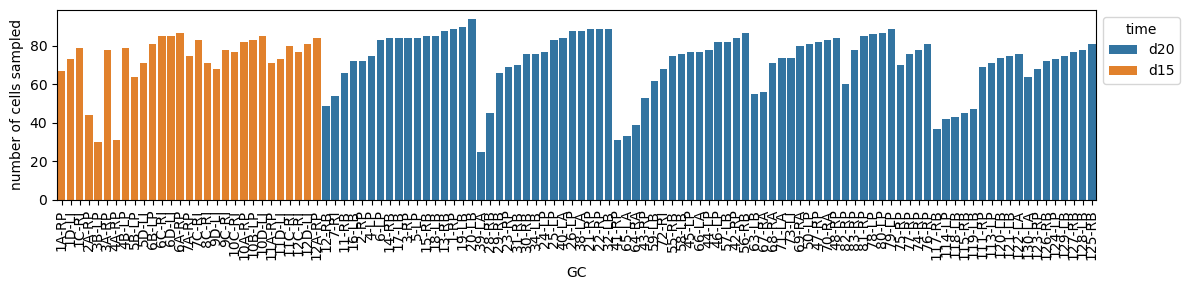

In [125]:
order = groups_df.sort_values(["time", "mouse", "number of cells"]).index

plt.figure(figsize=(12, 3))
ax = sns.barplot(x=groups.GC.first(),
                 y=pd.Series(groups.size(), name="number of cells sampled"),
                 hue=groups.time.first(), dodge=False, order=order, linewidth=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel("GC")
plt.tight_layout()
plt.savefig(f"{output_dir}/ncells-violin.pdf")
plt.show()

### Distribution of total SHM

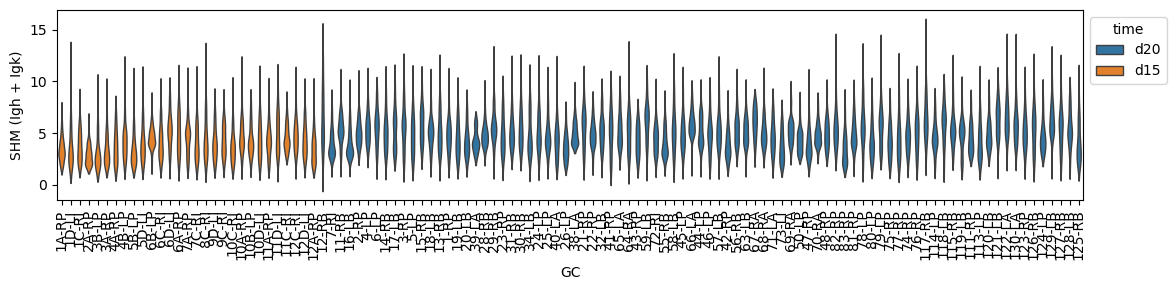

In [127]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(data=df, x="GC", y="SHM (Igh + Igk)", hue="time",
                 fliersize=0,
                 dodge=False, order=order, linewidth=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("GC")
plt.tight_layout()
plt.ylim(-3, None)
plt.savefig(f"{output_dir}/shm-violin.pdf")
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/s

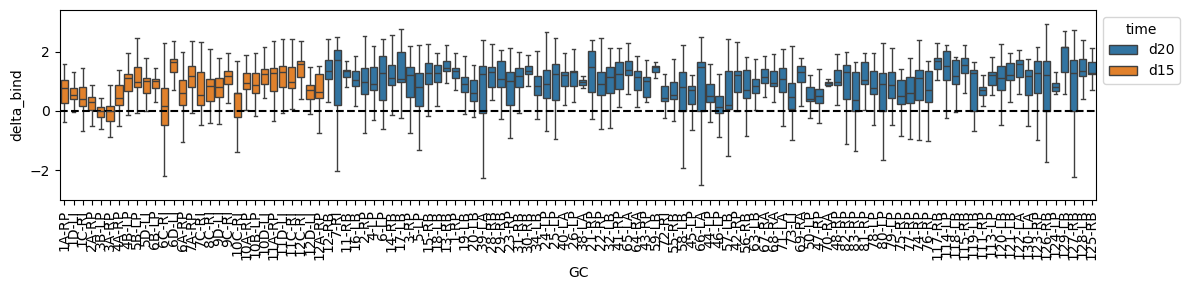

In [136]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(data=df, x="GC", y="delta_bind", hue="time",
                 fliersize=0,
                 dodge=False, order=order, linewidth=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("GC")
plt.tight_layout()
plt.ylim(-3, None)
plt.savefig(f"{output_dir}/affinity-violin.pdf")
plt.show()

Write data to csv file

In [138]:
df.to_csv(f"{output_dir}/data.csv")